# LeNet 5

In this notebook we are going to build a classification model for MNIST dataset. Our network is based on LeNet5 architecture.

http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

This networks differs from the original network in the following ways

**Activation Layer**
**Pooling Layer**
**Dropout**


## Define the Model

In [81]:
from keras.layers import Input, Conv2D, Dense,AveragePooling2D, Flatten, Activation,Dense, Dropout
from keras.models import Model
from keras.backend import tf as ktf
import numpy as np
np.random.seed(123)




def lenet_model(**kwargs):
    
    input_shape = kwargs['input_shape']
    nb_classes  = kwargs['nb_classes']
    
    optimizer = kwargs['optimizer']
    loss      = kwargs['loss']
    mets      = kwargs['metrics']
    
    


    
    x_input = Input(input_shape)
    
    x = Conv2D(filters = 6, kernel_size = (5,5), strides = (1,1), \
               padding = "valid", kernel_initializer='glorot_uniform')(x_input)
    
    x = Activation("relu")(x)
    
    x = AveragePooling2D(pool_size = (2,2), strides = (2,2))(x)
    
    x = Conv2D(filters = 16, kernel_size = (5,5), strides = (1,1), 
               padding = "valid", name = "conv_1",kernel_initializer='glorot_uniform')(x)
    
    x = Activation("relu")(x)


    x = AveragePooling2D(pool_size = (2,2), strides = (2,2))(x)
    
    x = Flatten()(x)
    
    x = Dense(120, activation = "relu")(x)
    
    x = Dropout(rate = 0.5)(x)
    
    x = Dense(120, activation ="relu")(x)
    
    x = Dropout(rate = 0.5)(x)

    
    predictions = Dense(nb_classes, activation="softmax")(x)
    
    model = Model(inputs = x_input, outputs = predictions)
    model.compile(optimizer = optimizer, loss= loss, metrics = mets)

    
    return model

    


    



In [82]:
from keras.datasets import mnist
from keras.utils import np_utils


nb_classes = 10

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Reshape to add the channel
# input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)


x_train.shape

(60000, 28, 28, 1)

In [ ]:
from keras import optimizers
from keras.callbacks import History, EarlyStopping




# Model Input Dictionary
model_input = {}

model_input['input_shape'] = x_train.shape[1:]
model_input['nb_classes']  = nb_classes

# Optimizer
sgd = optimizers.SGD(lr=0.001, momentum=0, decay=0, nesterov=False)
model_input['optimizer'] = sgd
model_input['loss']      = 'categorical_crossentropy'
model_input['metrics']   = ['accuracy']

# Callbacks
early_stop_th = 10**-7
callbacks = [EarlyStopping(monitor='acc', min_delta=early_stop_th, patience=5, verbose=0, mode='auto')]



model = lenet_model(**model_input)
batch_size = 64
epochs = 100

hist = model.fit(x_train, y_train, validation_split = 0.1, 
                 batch_size = batch_size,callbacks = callbacks ,epochs = epochs, verbose = 1)





  



Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 11s 196us/step - loss: 2.5862 - acc: 0.1884 - val_loss: 1.8470 - val_acc: 0.4353
Epoch 2/100
54000/54000 [==============================] - 10s 189us/step - loss: 1.8564 - acc: 0.3358 - val_loss: 1.2352 - val_acc: 0.6993
Epoch 3/100
54000/54000 [==============================] - 10s 187us/step - loss: 1.4537 - acc: 0.4930 - val_loss: 0.7779 - val_acc: 0.8093
Epoch 4/100
54000/54000 [==============================] - 10s 184us/step - loss: 1.1614 - acc: 0.6045 - val_loss: 0.5506 - val_acc: 0.8610
Epoch 5/100
54000/54000 [==============================] - 10s 191us/step - loss: 0.9558 - acc: 0.6818 - val_loss: 0.3980 - val_acc: 0.8947
Epoch 6/100
54000/54000 [==============================] - 10s 193us/step - loss: 0.8086 - acc: 0.7363 - val_loss: 0.3130 - val_acc: 0.9127
Epoch 7/100
54000/54000 [==============================] - 10s 193us/step - loss: 0.7020 - acc: 0.7753 - val_lo

Epoch 59/100
54000/54000 [==============================] - 7242s 134ms/step - loss: 0.1366 - acc: 0.9627 - val_loss: 0.0550 - val_acc: 0.9853
Epoch 60/100
54000/54000 [==============================] - 28s 525us/step - loss: 0.1375 - acc: 0.9627 - val_loss: 0.0546 - val_acc: 0.9850
Epoch 61/100
54000/54000 [==============================] - 7230s 134ms/step - loss: 0.1326 - acc: 0.9625 - val_loss: 0.0531 - val_acc: 0.9863
Epoch 62/100
54000/54000 [==============================] - 42s 779us/step - loss: 0.1337 - acc: 0.9632 - val_loss: 0.0563 - val_acc: 0.9845
Epoch 63/100
54000/54000 [==============================] - 1699s 31ms/step - loss: 0.1335 - acc: 0.9635 - val_loss: 0.0526 - val_acc: 0.9850
Epoch 64/100
54000/54000 [==============================] - 1713s 32ms/step - loss: 0.1293 - acc: 0.9647 - val_loss: 0.0518 - val_acc: 0.9867
Epoch 65/100
54000/54000 [==============================] - 29s 530us/step - loss: 0.1302 - acc: 0.9636 - val_loss: 0.0522 - val_acc: 0.9860
Epoch 6

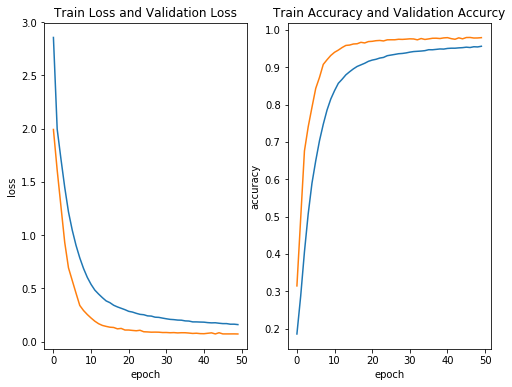

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_training(hist):

    fig = plt.figure(figsize=(8,6))
    plt.tight_layout()
    plt.subplot(121)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title("Train Loss and Validation Loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(loc='upper left')
    plt.subplot(122)
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title("Train Accuracy and Validation Accurcy")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend(loc='upper left')



plot_training(hist)



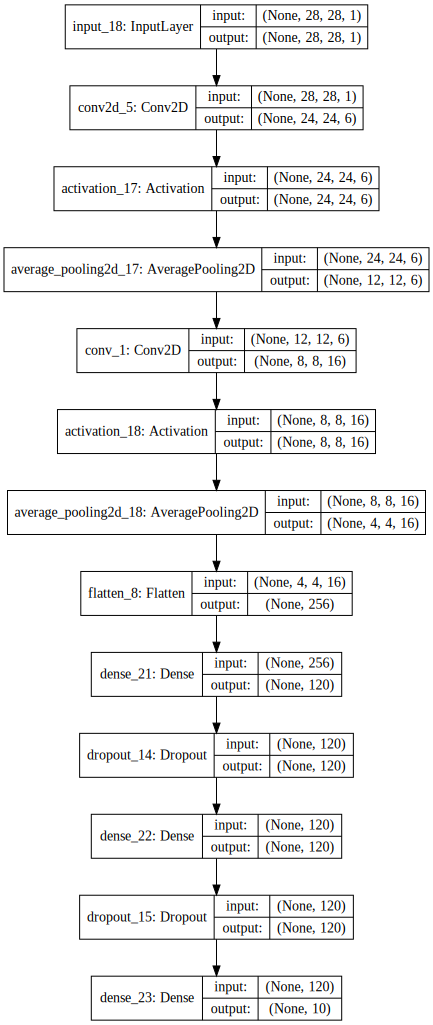

In [73]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))



In [80]:
print("\nTest Evaluation\n")
metrics = model.evaluate(x=x_test, y=y_test, batch_size=batch_size, verbose=1, sample_weight=None, steps=None)
for k,v in zip(model.metrics_names, metrics):
    print (k,v)
print('error {:0.2f}%'.format( (1-v) * 100 ))


Test Evaluation

10000/10000 [==============================] - 1s 79us/step
loss 0.0822825811634
acc 0.9765
error 2.35%


## Comparing Error %

http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html


